In the crop recommendation, the user can provide the parameters like N-P-K, temperature, humidity, pH value, rainfall, crop from their side and the application will predict which crop should the user grow.

Nitrogen (N) – Nitrogen is largely responsible for the growth of leaves on the plant.

Phosphorus (P) – Phosphorus is largely responsible for root growth and flower and fruit development.

Potassium (K) – Potassium is a nutrient that helps the overall functions of the plant perform correctly.

## Importing Libraries

In [64]:
import pandas as pd 
import numpy as np 

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## 1. Dataset Importing

In [65]:
crop = pd.read_csv(r'E:\AlphaBits Intership Data Science\Purva\archive 17\Crop_recommendation.csv')
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## 2. Exploratory Data Analysis

In [66]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [67]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [68]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [69]:
crop.shape

(2200, 8)

In [70]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [71]:
crop['label'].nunique()

22

In [72]:
crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [73]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<AxesSubplot:xlabel='ph', ylabel='Density'>

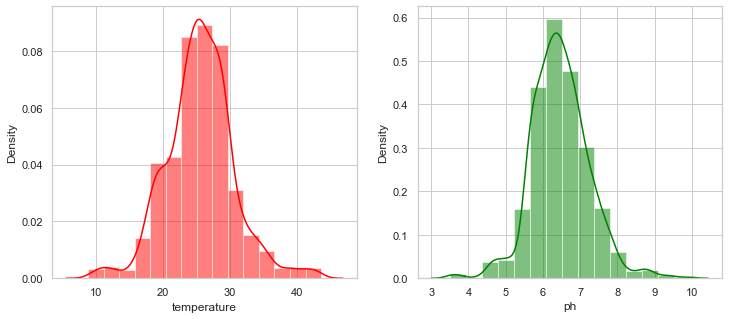

In [74]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(crop['temperature'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 2, 2)
sns.distplot(crop['ph'],color="green",bins=15,hist_kws={'alpha':0.5})

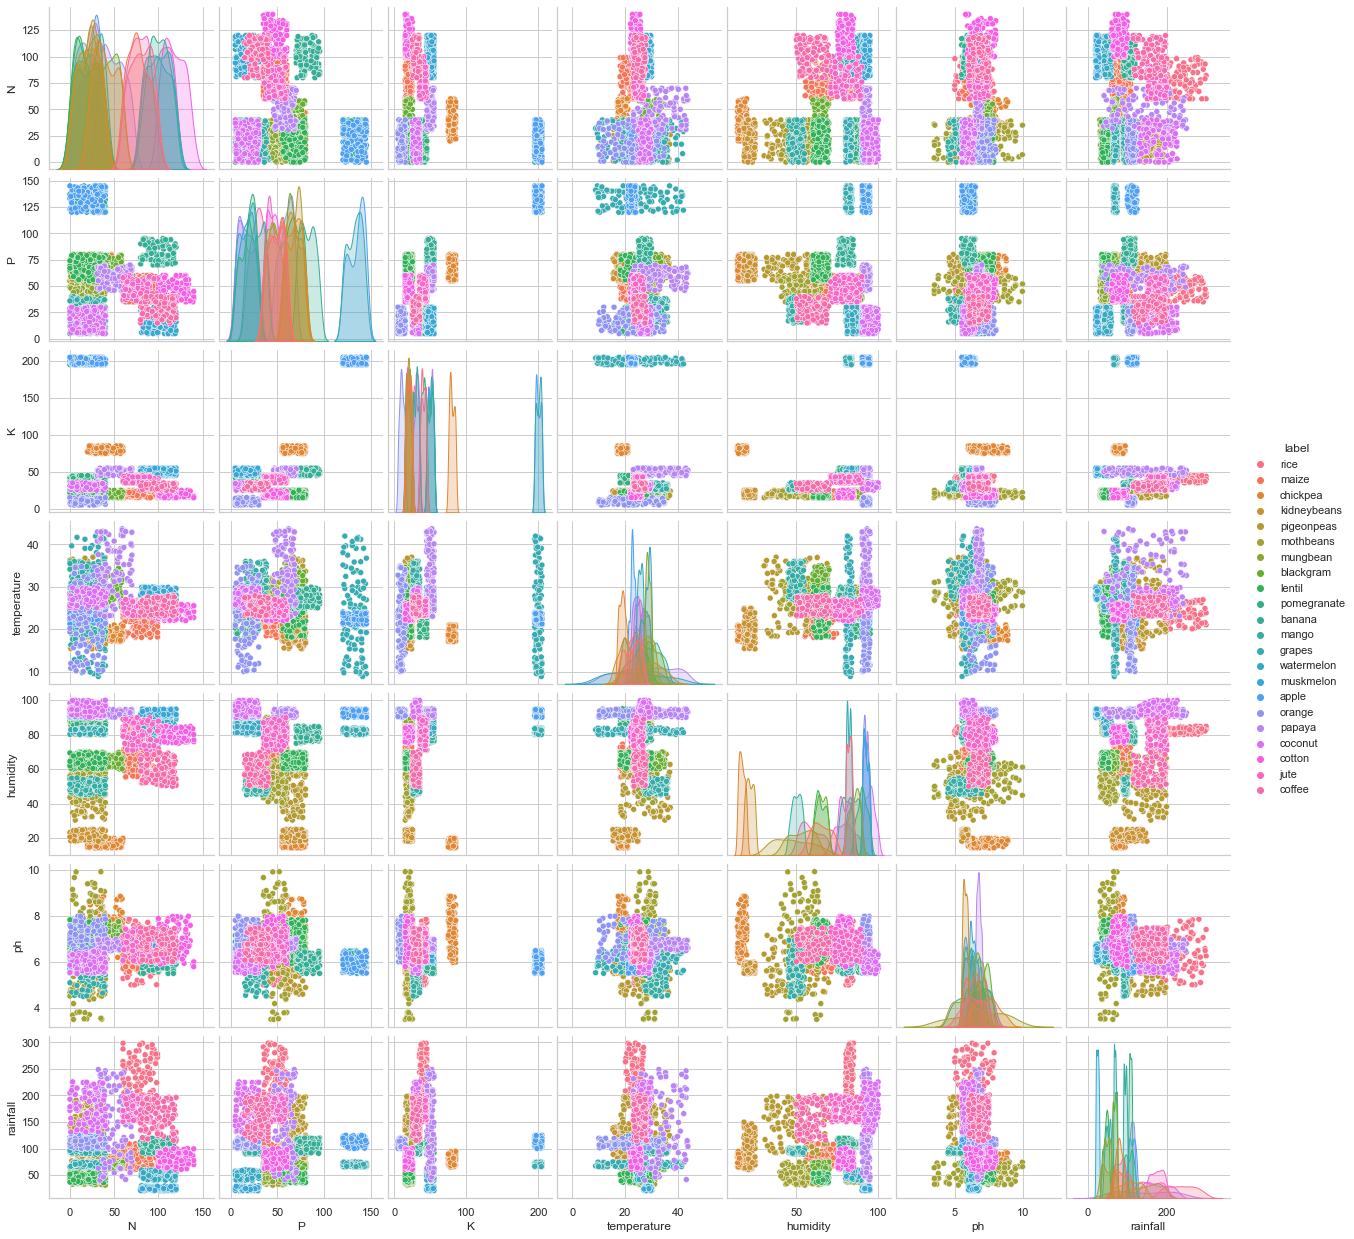

In [75]:
sns.pairplot(crop,hue = 'label')

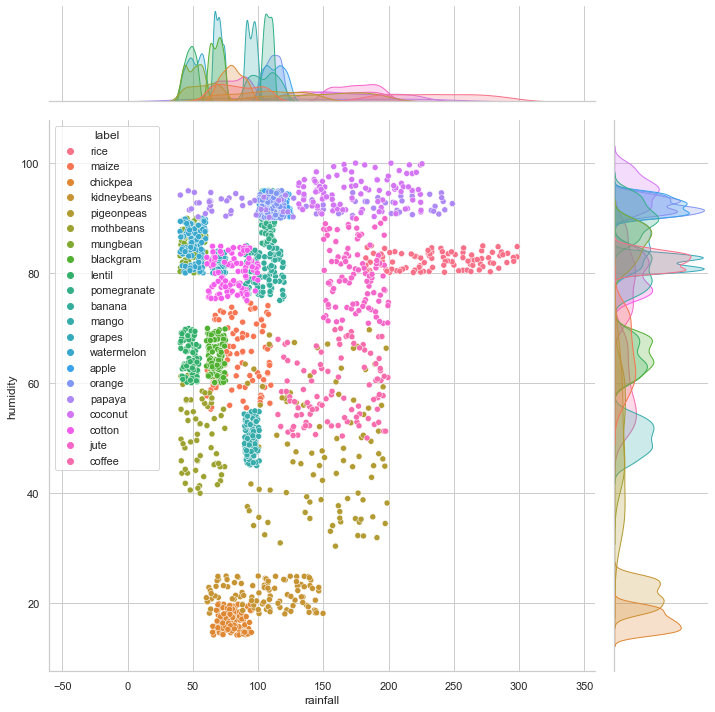

In [76]:
sns.jointplot(x="rainfall",y="humidity",data=crop[(crop['temperature']<40) & (crop['rainfall']>40)],height=10,hue="label")

<AxesSubplot:xlabel='label', ylabel='ph'>

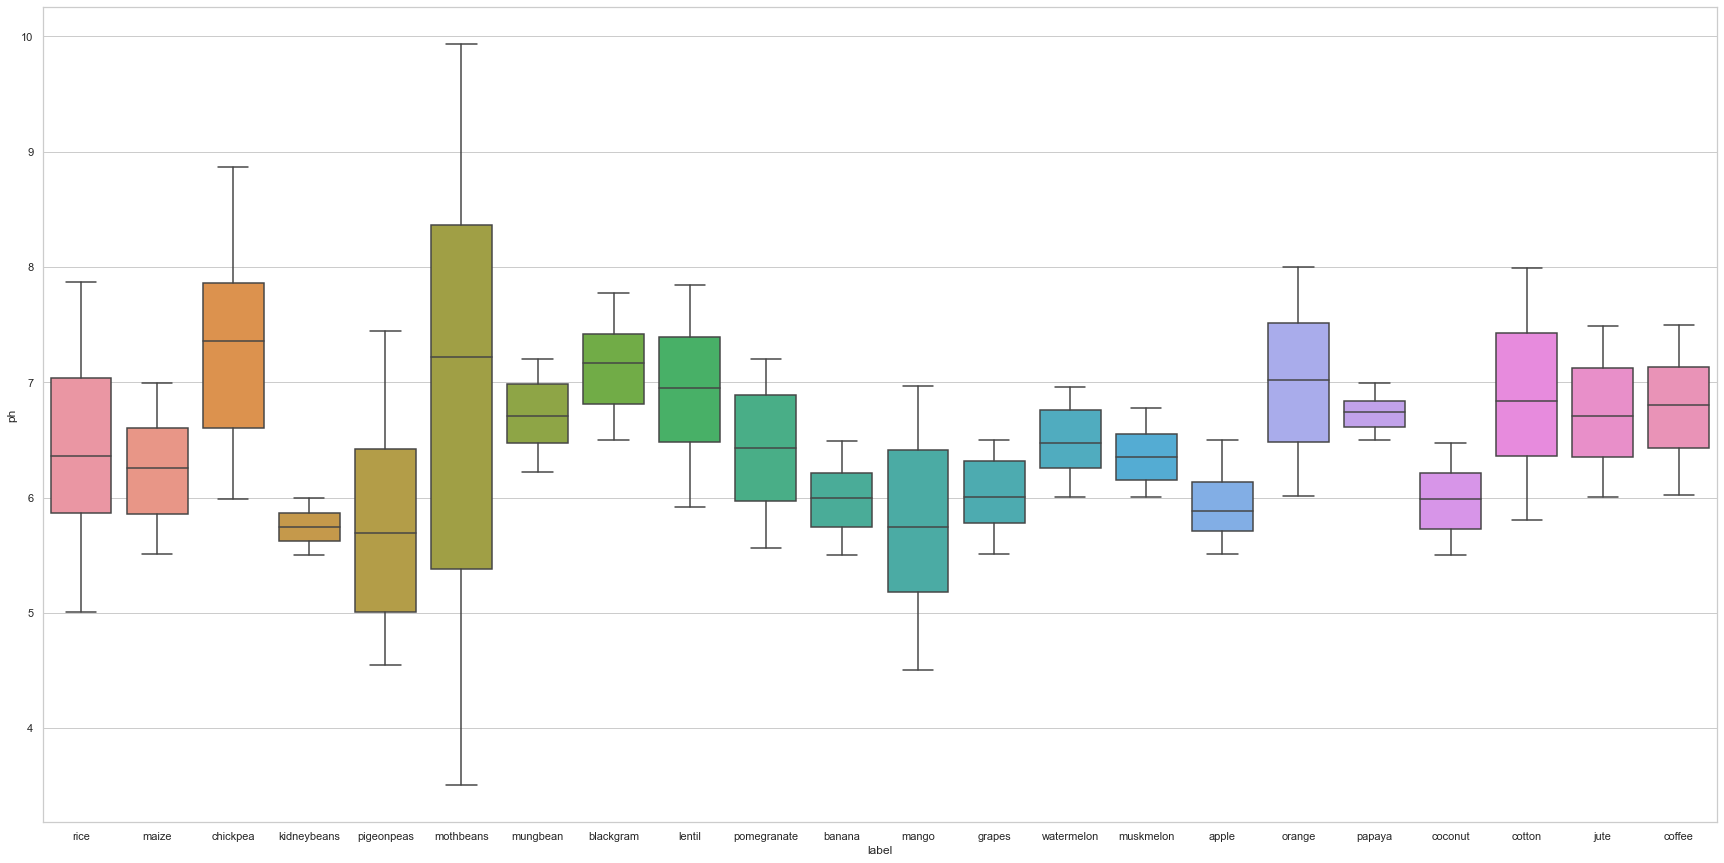

In [77]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='ph',data=crop)

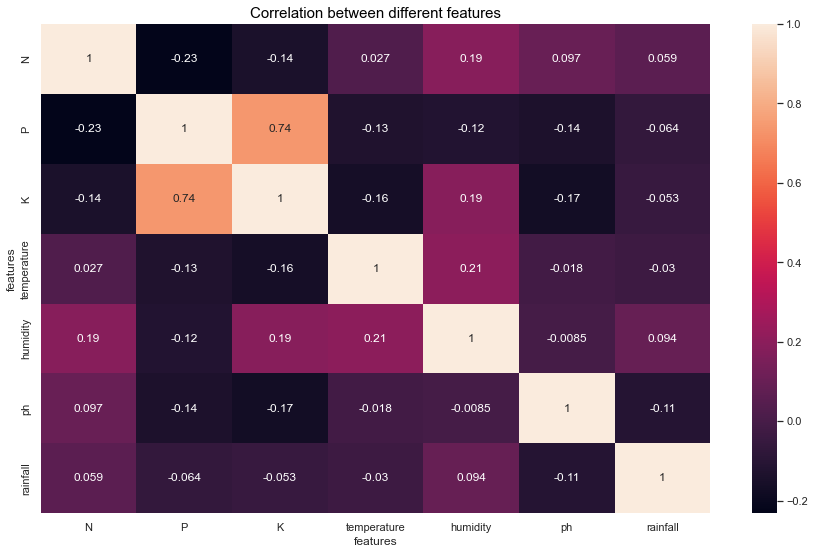

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [79]:
crop_summary = pd.pivot_table(crop,index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [80]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))

fig.update_layout(title="N-P-K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()


## 4. Feature Selection

In [81]:
from sklearn.preprocessing import LabelEncoder
y = crop['label']
# Convert string labels to integer values
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(y)

In [82]:
features = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [114]:
acc = []
model = []

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

# Modeling Classification algorithms

## K-Nearest Neighbors

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.89      0.86      0.87        28
           9       0.93      1.00      0.97        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      0.89      0.94        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
   

In [122]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


In [123]:
#Print Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.9886363636363636
knn_test_accuracy =  0.975


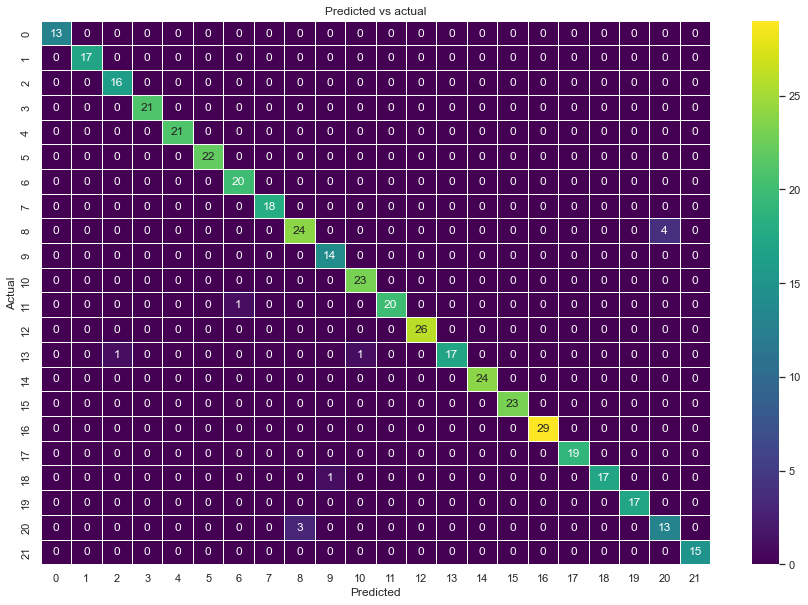

In [124]:
y_pred = knn.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

## Hyperparameter Tuning

One of the challenges in a KNN algorithm is finding the best 'k' i.e. the number of neighbors to be used in the majority vote while deciding the class. Generally, it is advisable to test the accuracy of your model for different values of k and then select the best one from them.

In [125]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.97045455, 0.96363636, 0.97045455, 0.96363636, 0.975     ,
       0.975     , 0.97727273, 0.96818182, 0.97272727, 0.97045455,
       0.97272727, 0.96818182, 0.96818182, 0.96818182, 0.97045455,
       0.97045455, 0.97045455, 0.97272727, 0.97272727, 0.97272727])

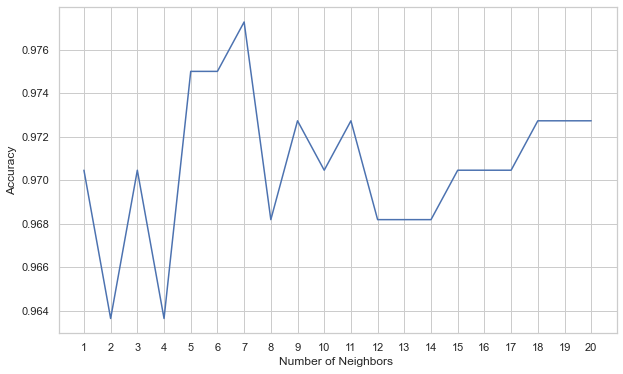

In [126]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [127]:
from sklearn.model_selection import GridSearchCV

We will use three hyperparamters- n-neighbors, weights and metric:
* n_neighbors: Decide the best k based on the values we have computed earlier. 
* weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points. 
* metric: The distance metric to be used will calculating the similarity

In [128]:
grid_params = { 'n_neighbors' : [12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [129]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [130]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [131]:
g_res.best_score_

0.9789756440743992

In [132]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [133]:
# Using the best hyperparameters
knn_1 = KNeighborsClassifier(n_neighbors = 12, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn_1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=12,
                     weights='distance')

In [134]:
# Training & Testing accuracy after applying hyper parameter
knn_train_accuracy = knn_1.score(x_train,y_train)
print("knn_train_accuracy = ",knn_1.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn_1.score(x_test,y_test)
print("knn_test_accuracy = ",knn_1.score(x_test,y_test))

knn_train_accuracy =  1.0
knn_test_accuracy =  0.9727272727272728


# Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  90.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.59      1.00      0.74        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.74      0.93      0.83        28
           9       0.00      0.00      0.00        14
          10       0.68      1.00      0.81        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.00      0.00      0.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00   

In [136]:
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]


In [137]:
#Print Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  0.8818181818181818
Testing accuracy =  0.9


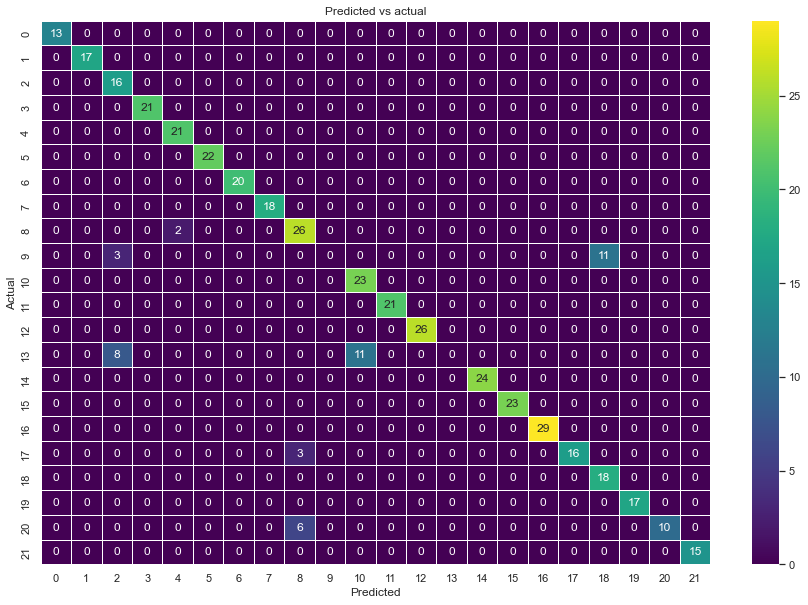

In [138]:
y_pred = DT.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00  

In [140]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]


In [141]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.990909090909091


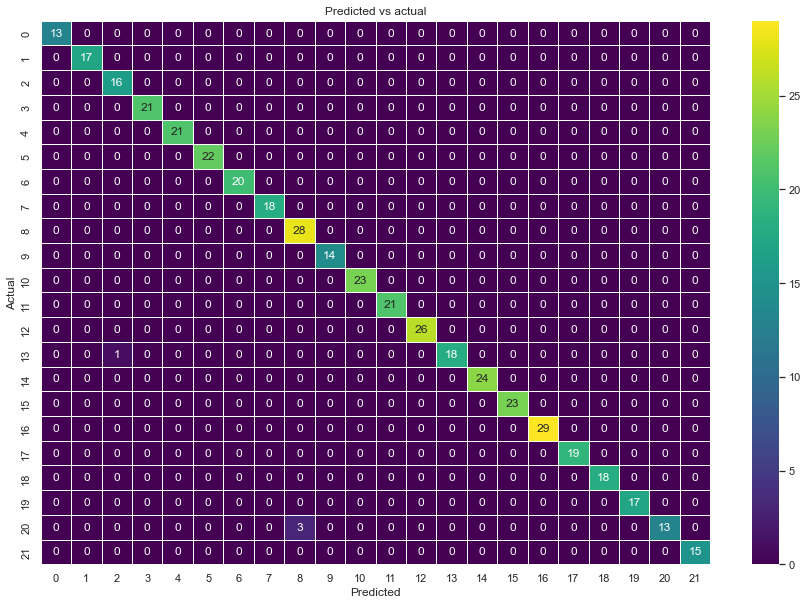

In [142]:
y_pred = RF.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# Naive Bayes Classifier

In [143]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00    

In [144]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [145]:
#Print Train Accuracy
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))
#Print Test Accuracy
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Training accuracy =  0.9960227272727272
Testing accuracy =  0.990909090909091


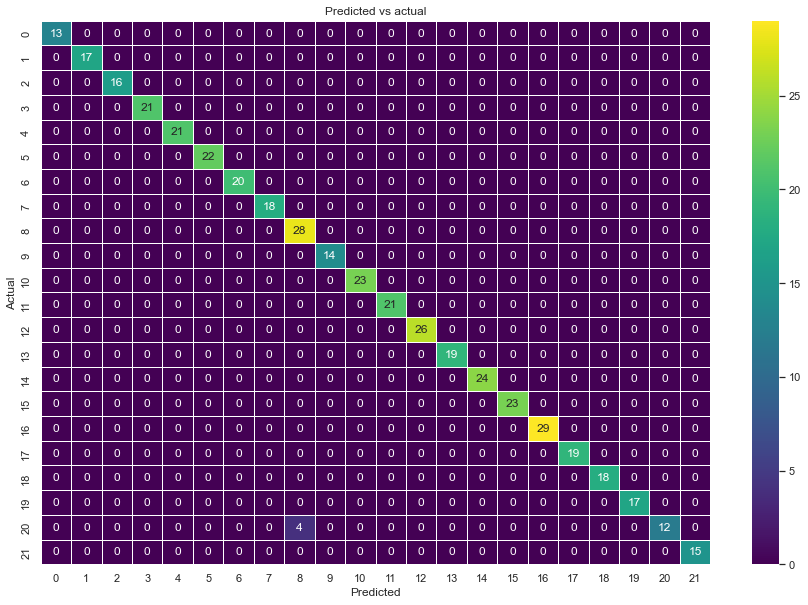

In [146]:
y_pred = NaiveBayes.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# eXtreme Gradient Boosting (XGBoost)

In [116]:
from sklearn.preprocessing import LabelEncoder
y = crop['label']
# Convert string labels to integer values
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(y)

In [117]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(x_train,y_train)

predicted_values = XB.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values);
acc.append(x)
model.append('XGBoost')
print("XGBoost Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

XGBoost Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       1.00      0.93      0.96        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1

In [118]:
score = cross_val_score(XB,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99318182 0.99318182 0.99318182 0.99090909 0.99090909]


In [119]:
#Print Train Accuracy
XB_train_accuracy = XB.score(x_train,y_train)
print("Training accuracy = ",XB.score(x_train,y_train))
#Print Test Accuracy
XB_test_accuracy = XB.score(x_test,y_test)
print("Testing accuracy = ",XB.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.9931818181818182


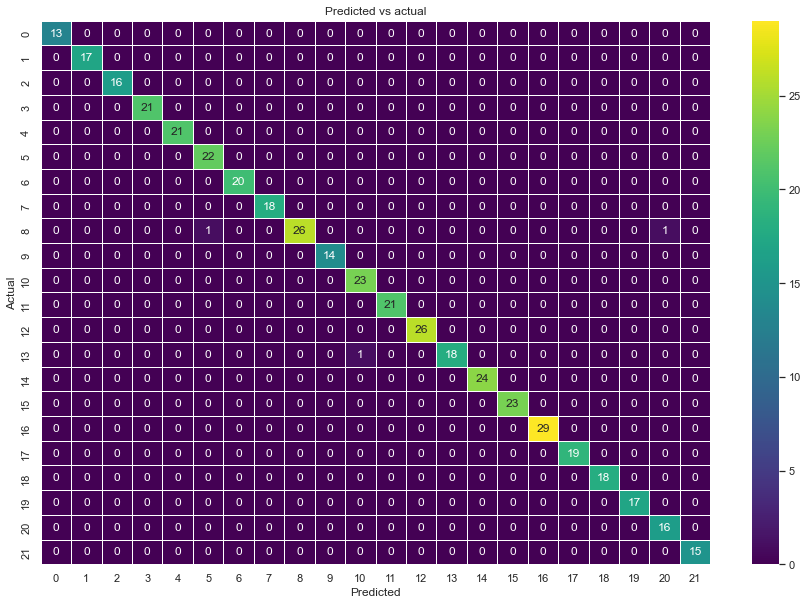

In [120]:
y_pred = XB.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# 7. Accuracy comparison

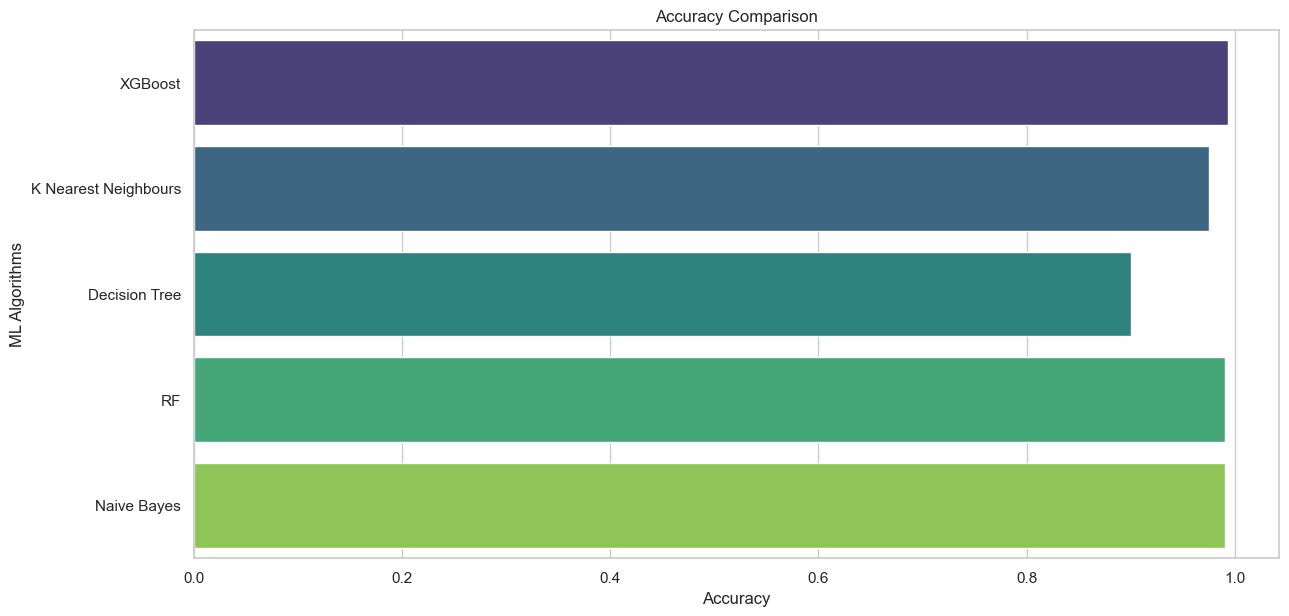

In [147]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

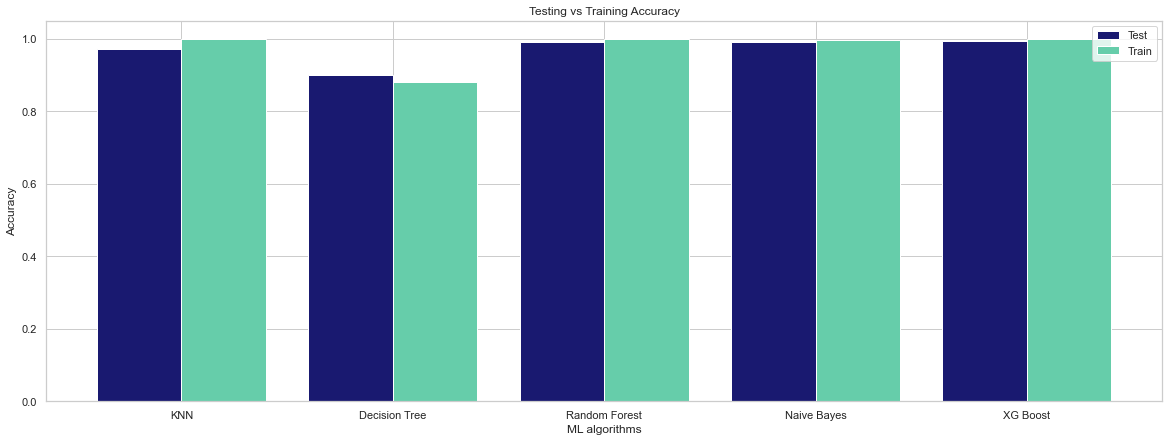

In [148]:
label = ['KNN', 'Decision Tree','Random Forest','Naive Bayes','XG Boost']
Test = [knn_test_accuracy, dt_test_accuracy,rf_test_accuracy,
        nb_test_accuracy, XB_test_accuracy]
Train = [knn_train_accuracy,  dt_train_accuracy, rf_train_accuracy,
         nb_train_accuracy, XB_train_accuracy]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

As our dataset is cleaned already, I have performed EDA, Feature selection on this dataset. There was no any missing values.
In our Crop recommandation dataset Dependent variable(Y) is Label and remaining columns are Independent Variable(x). In target variable there are 21 sub labels are present. so I performed LabelEncoding on target variable. 
I used different machine learning algorithms like XGBoost, RandomForest, Naive Bayes, KNN and DecisionTree Algorithms.
I have seen that XGBoost, RandomForest and Naive Bayes having 99% Accuracy, KNN 97% and DecisionTree having 90% accuracy.
So, we can say that XGBoost, RF, NaiveBayes is best fitted model for this dataset. But out of these three algorithms XGBoost achieved best accuracy result that is 99.31%.